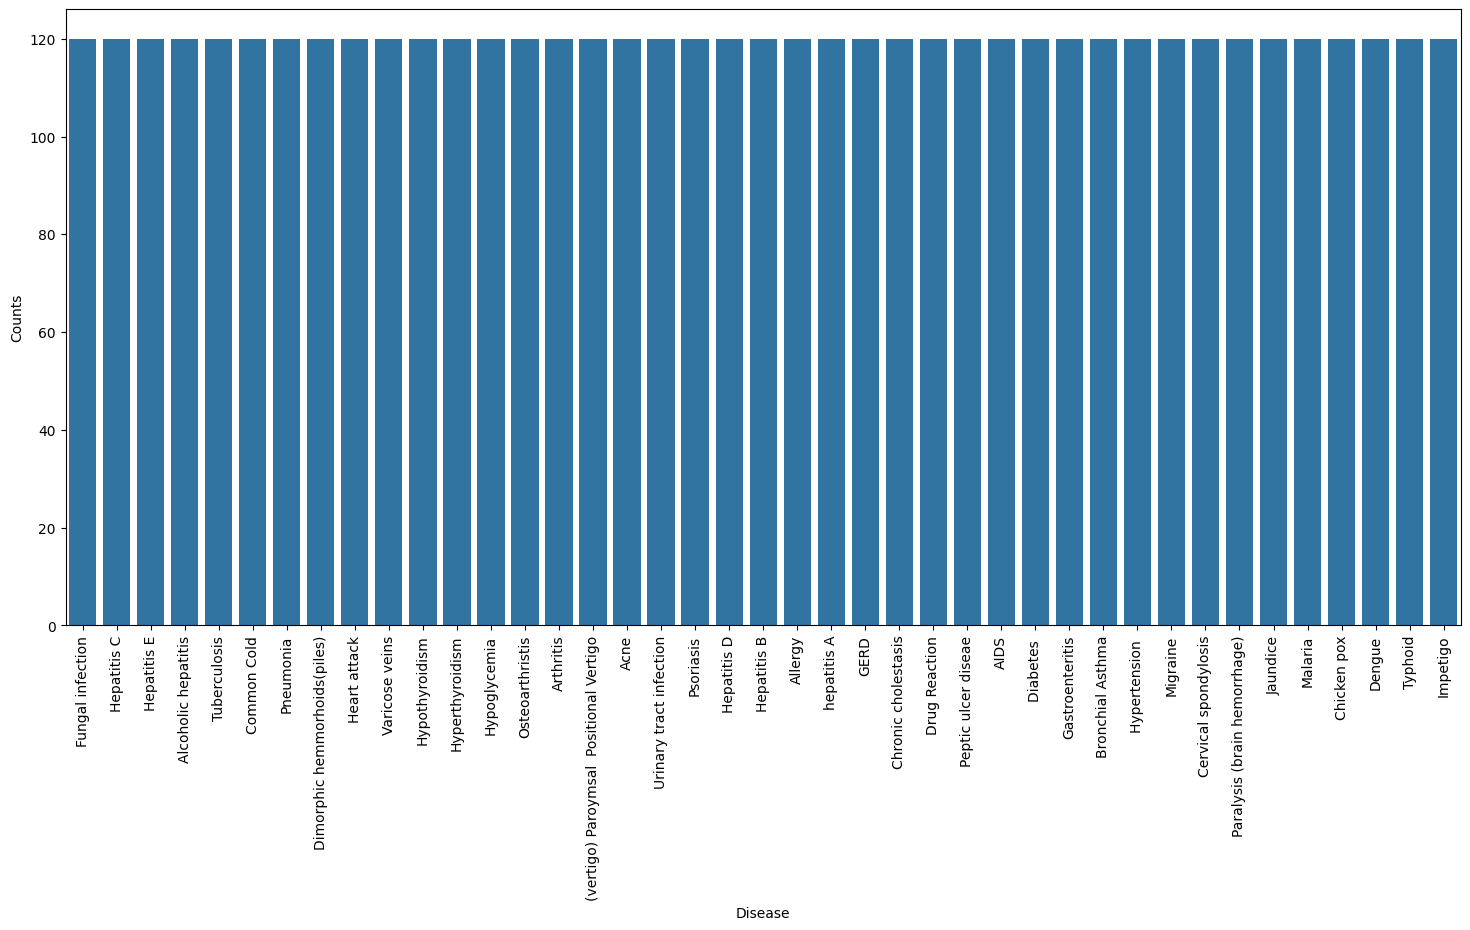

In [18]:
# Importing libraries 
import numpy as np 
import pandas as pd 
from scipy.stats import mode 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix 

%matplotlib inline
# Reading the train.csv by removing the 
# last column since it's an empty column 
DATA_PATH = "Training.xls"
data = pd.read_csv(DATA_PATH).dropna(axis = 1) 

# Checking whether the dataset is balanced or not 
disease_counts = data["prognosis"].value_counts() 
temp_df = pd.DataFrame({ 
	"Disease": disease_counts.index, 
	"Counts": disease_counts.values 
}) 

plt.figure(figsize = (18,8)) 
sns.barplot(x = "Disease", y = "Counts", data = temp_df) 
plt.xticks(rotation=90) 
plt.show()


In [19]:
# Encoding the target value into numerical 
# value using LabelEncoder 
encoder = LabelEncoder() 
data["prognosis"] = encoder.fit_transform(data["prognosis"]) 
X = data.iloc[:,:-1] 
y = data.iloc[:, -1] 
X_train, X_test, y_train, y_test =train_test_split( 
X, y, test_size = 0.2, random_state = 24) 

print(f"Train: {X_train.shape}, {y_train.shape}") 
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [20]:
# Defining scoring metric for k-fold cross validation 
def cv_scoring(estimator, X, y): 
	return accuracy_score(y, estimator.predict(X)) 

# Initializing Models 
models = { 
	"SVC":SVC(), 
	"Gaussian NB":GaussianNB(), 
	"Random Forest":RandomForestClassifier(random_state=18) 
} 

# Producing cross validation score for the models 
for model_name in models: 
	model = models[model_name] 
	scores = cross_val_score(model, X, y, cv = 10, 
							n_jobs = -1, 
							scoring = cv_scoring) 
	print("=="*30) 
	print(model_name) 
	print(f"Scores: {scores}") 
	print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier: 100.00%
Accuracy on test data by SVM Classifier: 100.00%
Classification Report for SVM Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        29
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        29
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        17
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        27
          14       1.00      1.00      1.00    

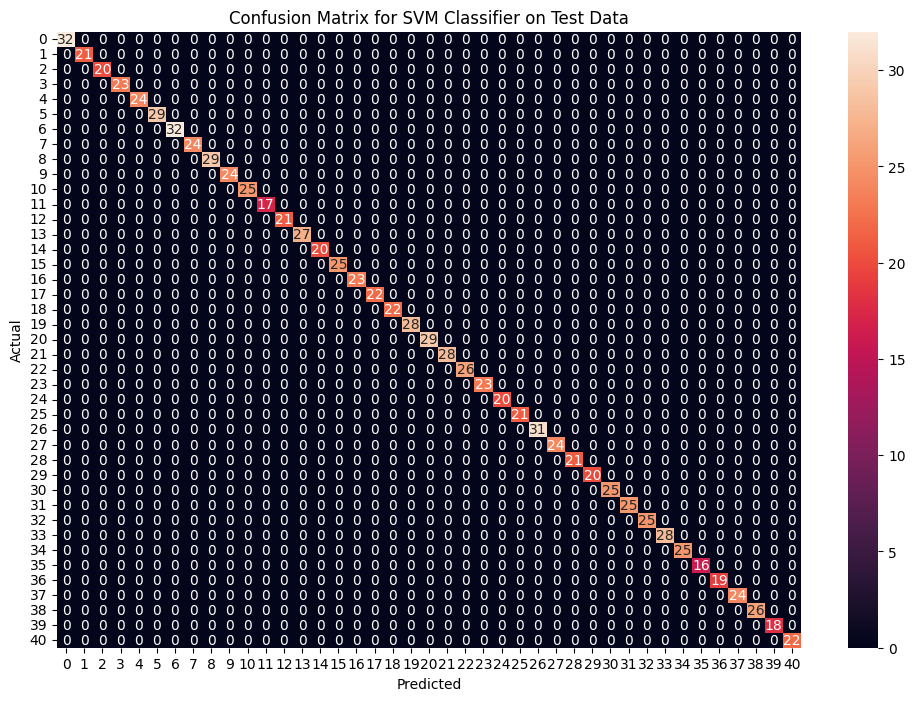

Accuracy on train data by Naive Bayes Classifier: 100.00%
Accuracy on test data by Naive Bayes Classifier: 100.00%
Classification Report for Naive Bayes Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        29
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        29
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        17
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        27
          14       1.00

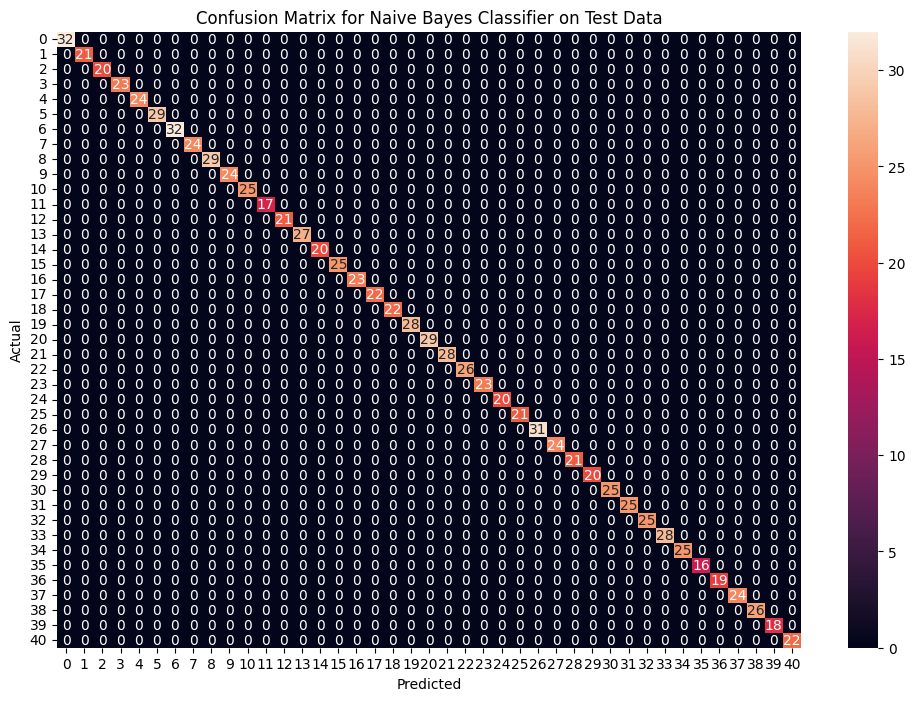

Accuracy on train data by Random Forest Classifier: 100.00%
Accuracy on test data by Random Forest Classifier: 100.00%
Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        29
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        29
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        17
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        27
          14     

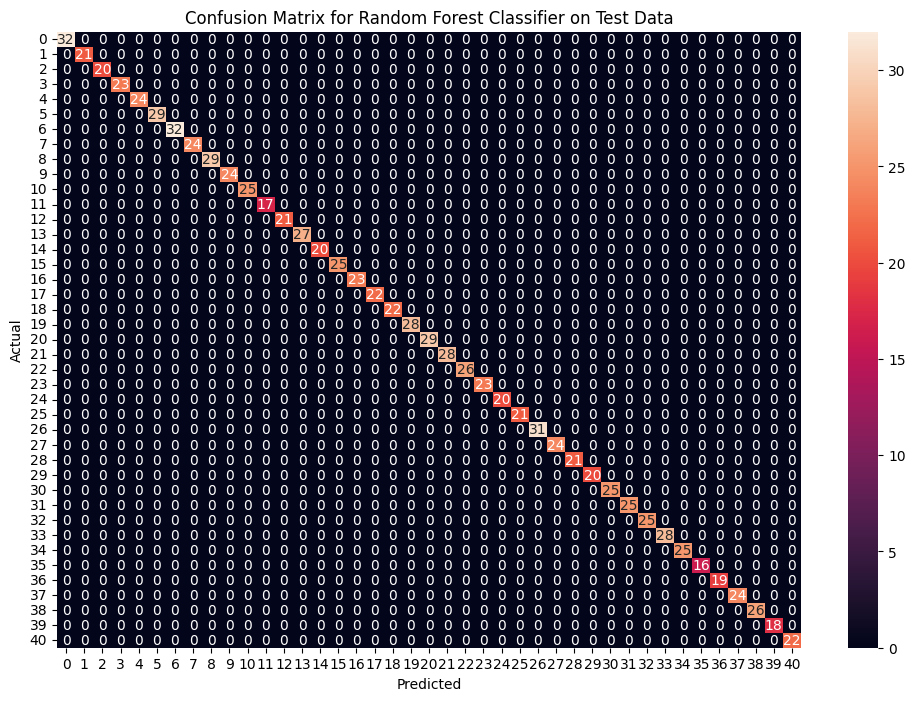

In [21]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Reading the dataset
DATA_PATH = "Training.xls"
data = pd.read_csv(DATA_PATH).dropna(axis=1)

# Encoding the target value into numerical value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

# Splitting the data for training and testing the model
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Define a function to train, predict and plot confusion matrix for a given model
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    print(f"Accuracy on train data by {model_name}: {accuracy_score(y_train, model.predict(X_train))*100:.2f}%")
    print(f"Accuracy on test data by {model_name}: {accuracy_score(y_test, preds)*100:.2f}%")
    
    print(f"Classification Report for {model_name}:\n {classification_report(y_test, preds)}")
    
    cf_matrix = confusion_matrix(y_test, preds)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cf_matrix, annot=True, fmt='d')
    plt.title(f"Confusion Matrix for {model_name} on Test Data")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Training and testing SVM Classifier
svm_model = SVC()
train_and_evaluate(svm_model, "SVM Classifier")

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
train_and_evaluate(nb_model, "Naive Bayes Classifier")

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
train_and_evaluate(rf_model, "Random Forest Classifier")


Accuracy on Test dataset by the combined model: 100.00%
Classification Report for Combined Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00    

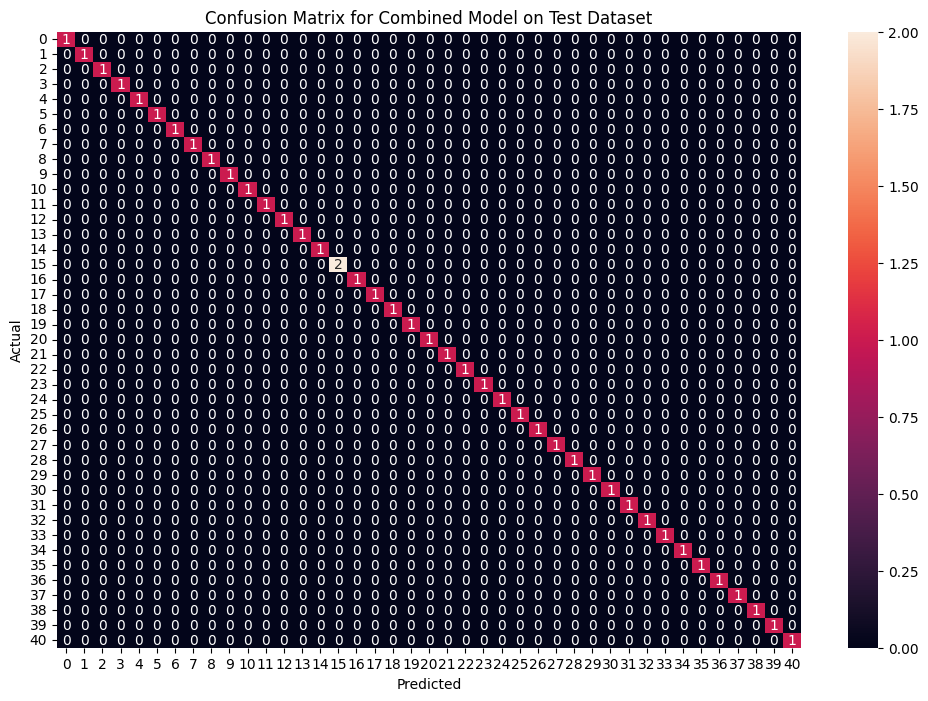

In [22]:
from collections import Counter
from scipy.stats import mode
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Training the models on the whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Reading the test data
test_data = pd.read_csv("Testing.xls").dropna(axis=1)
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making prediction by taking mode of predictions made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

# Calculate the final predictions using mode
def get_mode_predictions(*preds):
    return [Counter(pred).most_common(1)[0][0] for pred in zip(*preds)]

final_preds = get_mode_predictions(svm_preds, nb_preds, rf_preds)

# Evaluate the model
accuracy = accuracy_score(test_Y, final_preds)
print(f"Accuracy on Test dataset by the combined model: {accuracy * 100:.2f}%")

# Print classification report
print("Classification Report for Combined Model:")
print(classification_report(test_Y, final_preds))

# Plot confusion matrix
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Load the datasets
training_data = pd.read_csv('Training.xls').dropna(axis=1)
testing_data = pd.read_csv('Testing.xls').dropna(axis=1)

# Separate features and target
X = training_data.iloc[:, :-1]
y = training_data.iloc[:, -1]

# Encode the target labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Training the models on the whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Creating a symptom index dictionary to encode the input symptoms into numerical form
symptoms = X.columns.values
symptom_index = {symptom.replace("_", " ").capitalize(): index for index, symptom in enumerate(symptoms)}

# Create a mapping dictionary for data
data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}

# Defining the Function
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # Creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        symptom = symptom.strip().capitalize()
        if symptom in data_dict["symptom_index"]:
            index = data_dict["symptom_index"][symptom]
            input_data[index] = 1
        else:
            print(f"Symptom '{symptom}' not found in symptom index.")
            return None
        
    # Reshaping the input data and converting it into suitable format for model predictions
    input_df = pd.DataFrame([input_data], columns=X.columns)
    
    # Generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_df)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_df)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_df)[0]]
    
    # Making final prediction by taking mode of all predictions
    final_prediction = Counter([rf_prediction, nb_prediction, svm_prediction]).most_common(1)[0][0]
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin rash,Nodal skin eruptions"))


{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


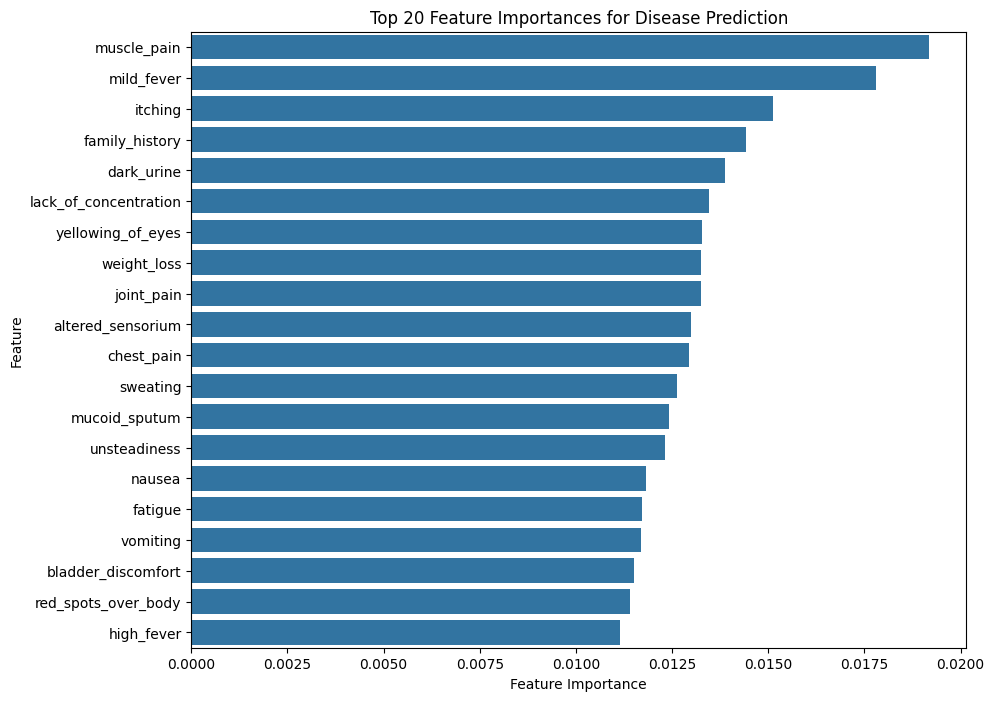

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `final_rf_model` is already trained and available

# Using the already trained RandomForestClassifier to get feature importances
feature_importances = final_rf_model.feature_importances_
features = X.columns

# Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 20 features
top_features = feature_importance_df.head(20)

# Plotting the top 20 feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=top_features['Importance'], y=top_features['Feature'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances for Disease Prediction')
plt.show()


In [25]:
!pip install shap

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 763.1 kB/s eta 0:00:00
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
   ---------------------------------------- 0.0/455.7 kB ? eta -:--:--
   --------- ------------------------------ 112.6/455.7 kB 3.3 MB/s eta 0:00:01
   ------------- -------------------------- 153.6/455.7 kB 1.5 MB/s eta 0:00:01
   ---------------------------- ----------- 327.7/455.7 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------  450.6/455.7 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 455.7/455.7 kB 2.4 MB/s eta 0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB ? eta 0:00:00
   ---------------------------------------

c:\Users\chakr\Documents\GitHub\AIML-Project-Series\project-2-college-admission\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


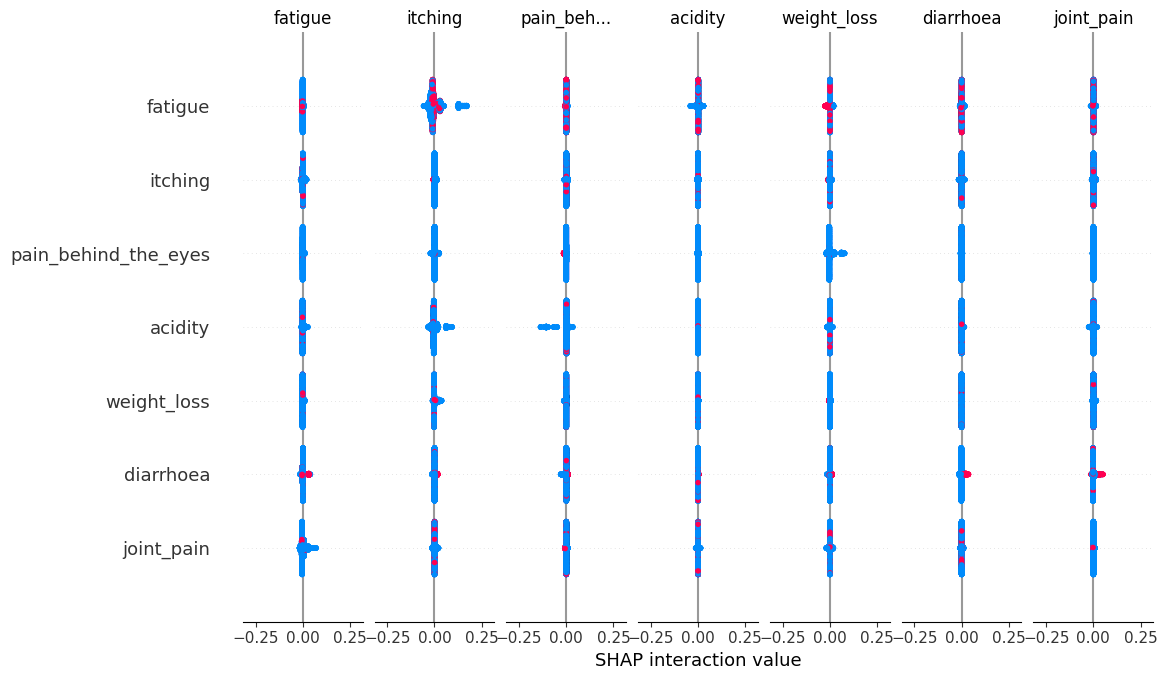

In [26]:
import shap

# Train the RandomForest model (if not already trained) with a subset of important features
# Using the already trained final_rf_model for SHAP
explainer = shap.TreeExplainer(final_rf_model)
shap_values = explainer.shap_values(X)

# Plotting the SHAP summary plot
shap.summary_plot(shap_values, X, plot_type="bar")


In [27]:
import joblib

# Save the models and necessary data
joblib.dump(final_rf_model, 'final_rf_model.pkl')
joblib.dump(final_nb_model, 'final_nb_model.pkl')
joblib.dump(final_svm_model, 'final_svm_model.pkl')
joblib.dump(data_dict, 'data_dict.pkl')
joblib.dump(X, 'X.pkl')


['X.pkl']

In [28]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=final_rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X, y)

# Print the best parameters
print(f"Best parameters found: {grid_search.best_params_}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import joblib

# Load your dataset
data = pd.read_csv('Training.xls').dropna(axis=1)

# Separate features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Encode the target labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Train the models
rf_model = RandomForestClassifier(random_state=18)
nb_model = GaussianNB()
svm_model = SVC()

rf_model.fit(X, y)
nb_model.fit(X, y)
svm_model.fit(X, y)

# Save the models and the encoder
joblib.dump(rf_model, 'final_rf_model.pkl')
joblib.dump(nb_model, 'final_nb_model.pkl')
joblib.dump(svm_model, 'final_svm_model.pkl')
joblib.dump(encoder, 'encoder.pkl')
joblib.dump(X.columns, 'X_columns.pkl')

# Create the data dictionary
symptom_index = {symptom.replace("_", " ").capitalize(): index for index, symptom in enumerate(X.columns)}
data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}
joblib.dump(data_dict, 'data_dict.pkl')


['data_dict.pkl']